<a href="https://colab.research.google.com/github/hossainsiam133/AgriGrow/blob/main/Code/AgriGrow_Siam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crop = pd.read_csv("Crop_recommendation.csv")
crops = crop.copy()


In [3]:
## Exploring crop dataset
print(crop.head(),"\n")
print("Shape:",crop.shape)
print("\nColumn name:",crop.columns.tolist())
print("\nData Types:")
print(crop.dtypes)
print(100 * "*")

print("\nMissing values per column:")
print(crop.isnull().sum())
print(100 * "*")

print("\nBasic Statistics:")
print(crop.describe())
print(100 * "*")


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice 

Shape: (2200, 8)

Column name: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

Data Types:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object
****************************************************************************************************

Missing values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
************

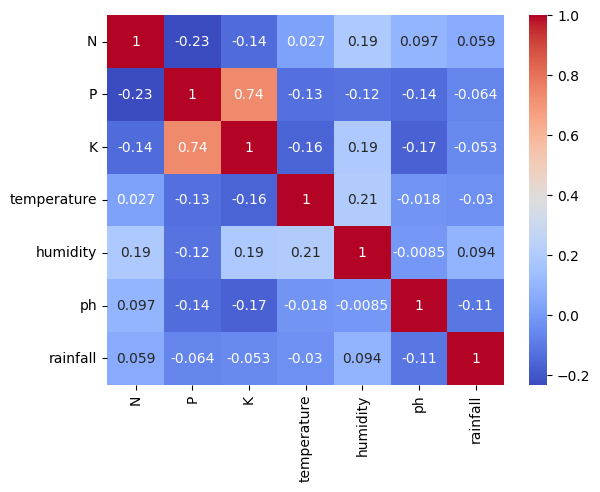

In [4]:
# corr = crop[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()
corr = crop.select_dtypes(include=['number']).corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [5]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


/tmp/ipython-input-3254175536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


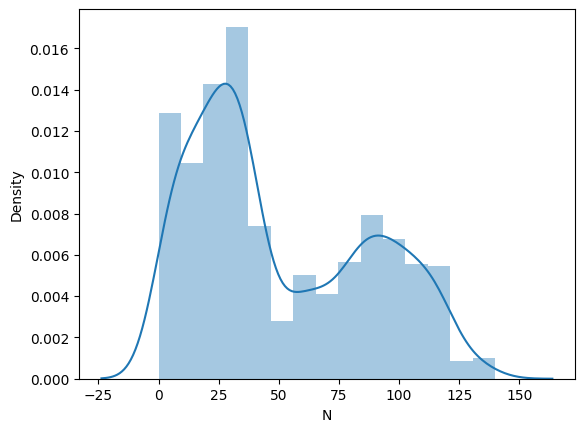

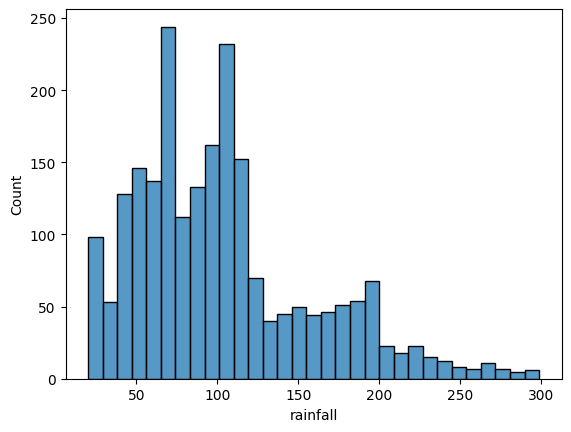

In [6]:
sns.distplot(crop['N'])
plt.show()
sns.histplot(crop['rainfall'])
plt.show()

In [80]:
crop = crops.copy()
crop_dict = {
    'apple': 1,
    'banana': 2,
    'blackgram': 3,
    'chickpea': 4,
    'coconut': 5,
    'coffee': 6,
    'cotton': 7,
    'grapes': 8,
    'jute': 9,
    'kidneybeans': 10,
    'lentil': 11,
    'maize': 12,
    'mango': 13,
    'mothbeans': 14,
    'mungbean': 15,
    'muskmelon': 16,
    'orange': 17,
    'papaya': 18,
    'pigeonpeas': 19,
    'pomegranate': 20,
    'rice': 21,
    'watermelon': 22
}
# print(crop_dict)
crop['label_num'] = crop['label'].map(crop_dict)
crop.drop('label',axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,21
1,85,58,41,21.770462,80.319644,7.038096,226.655537,21
2,60,55,44,23.004459,82.320763,7.840207,263.964248,21
3,74,35,40,26.491096,80.158363,6.980401,242.864034,21
4,78,42,42,20.130175,81.604873,7.628473,262.717340,21


## Train Test Split

In [8]:
x = crop.drop('label_num',axis=1)
y = crop['label_num']

In [9]:
print(x.shape)
print(y.shape)

(2200, 7)
(2200,)


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

(1760, 7)
(1760,)

(440, 7)
(440,)


## MinMax Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

## Standardization

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
# sns.histplot(x_train)
# plt.show()

In [18]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

## **Training**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

models = {
     'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier()
}
mx = -1
best_fit = ""
for name,md in models.items():
  md.fit(x_train,y_train)
  pred_y = md.predict(x_test)
  print(f"{name}: {accuracy_score(pred_y,y_test)}")
  if accuracy_score(pred_y,y_test) >= mx:
    mx = accuracy_score(pred_y,y_test)
    best_fit = name
print(f"\nBest Model:",best_fit)

Logistic Regression: 0.9636363636363636
Naive Bayes: 0.9954545454545455
Support Vector Machine: 0.9681818181818181
K-Nearest Neighbors: 0.9568181818181818
Decision Tree: 0.9863636363636363
Random Forest: 0.9931818181818182
Bagging: 0.9886363636363636
AdaBoost: 0.14545454545454545
Gradient Boosting: 0.9818181818181818
Extra Trees: 0.9295454545454546

Best Model: Naive Bayes


In [68]:
nb = GaussianNB()
nb.fit(x_train,y_train)
features = np.array([[104	,18,	30,	23.603016	,60.396475,	6.779833	,140.937041]])
ans = nb.predict(features)
print(ans)

[19]


## Predictions

In [69]:
def recommandation(N,P,K,temperature,humidity,	ph,	rainfall):
  input = np.array([[N,P,K,temperature,humidity,	ph,	rainfall]])
  output = nb.predict(input)
  return output


In [82]:
N = 20
P = 30
K = 40
temperature = 40.0
humidity = 20
ph = 30
rainfall = 50

predict = recommandation(N,P,K,temperature,humidity,	ph,	rainfall)
for key,value in crop_dict.items():
  if value == predict:
    print(key)
    break

coffee
